<a href="https://colab.research.google.com/github/whitechocobread/Ai-project/blob/main/%EA%B8%B0%EB%A7%90%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd

file_path = '/content/drive/MyDrive/삼성전자.xlsx'
data = pd.read_excel(file_path)

# 데이터 확인
print(data.head())

   labels                            Description 
0      -2         삼성전자 폴더블폰 시장 점유율이 86%에서 72%로 하락
1       1  글로벌 폴더블폰 시장이 전년 대비 16%, 전분기 대비 215% 증가
2      -1         중국 업체들의 공격적인 제품 출시로 삼성전자 점유율 하락
3       2      삼성 갤럭시Z 플립5와 폴드5, 시장에서 가장 잘 팔리는 모델
4       1  4분기 삼성전자 폴더블폰 점유율, 작년 83%에서 42%로 하락 예상


In [17]:
data

,labels,Description
0,-2,삼성전자 폴더블폰 시장 점유율이 86%에서 72%로 하락
1,1,"글로벌 폴더블폰 시장이 전년 대비 16%, 전분기 대비 215% 증가"
2,-1,중국 업체들의 공격적인 제품 출시로 삼성전자 점유율 하락
3,2,"삼성 갤럭시Z 플립5와 폴드5, 시장에서 가장 잘 팔리는 모델"
4,1,"4분기 삼성전자 폴더블폰 점유율, 작년 83%에서 42%로 하락 예상"
...,...,...
105,1,TSMC는 아이폰15·PC용 반도체 주문이 몰리며 실적 증가
106,-1,삼성전자는 중저가 5세대 AP 시스템온칩과 OLED DDI 주문 증가
107,0,세계 파운드리 시장 점유율 순위에서 삼성전자는 2위
108,-1,TSMC의 최첨단 3나노 제품이 매출의 6%를 차지


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   labels        110 non-null    int64 
 1   Description   110 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [19]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [20]:
# 중복 제거
data.drop_duplicates(subset=['Description '], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 110


<Axes: >

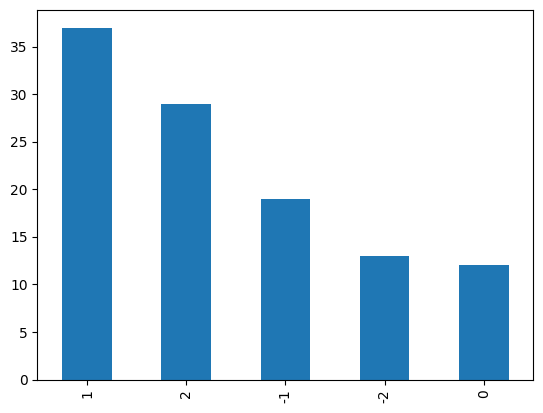

In [21]:
data['labels'].value_counts().plot(kind='bar')


In [22]:
X_data = data['Description ']
y_data = data['labels']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 110
레이블의 개수: 110


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

# train_data와 test_data 대신 X_train, X_test 사용
print(f"학습 데이터 크기: {len(X_train)}\n테스트 데이터 크기: {len(X_test)}")

학습 데이터 크기: 88
테스트 데이터 크기: 22


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cnt_vect = CountVectorizer()
X_train_vec = cnt_vect.fit_transform(X_train)
X_test_vec = cnt_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_vec, y_train)
y_pred = lr_clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print(f"분류 정확도 : {acc : .4f}")

분류 정확도 :  0.1364


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tf, y_train)
y_pred = lr_clf.predict(X_test_tf)
acc = accuracy_score(y_test, y_pred)
print(f"Tf-idf 백터화 후 정확도 : {acc : .4f}")

Tf-idf 백터화 후 정확도 :  0.2273


In [50]:
data = pd.DataFrame(list(data.items()), columns=['labels', 'Description '])

In [51]:
data

,labels,Description
0,labels,0 -2 1 1 2 -1 3 2 4 1 ...
1,Description,0 삼성전자 폴더블폰 시장 점유율이 86%에서 72%로 하락 ...
2,vader_pred,0 0 1 0 2 0 3 0 4 0 ...


In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import re
import nltk


!pip install vaderSentiment

In [53]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# 데이터 로딩 (예시: 첫 번째 행이 열 이름이라고 가정)
file_path = '/content/drive/MyDrive/삼성전자.xlsx'
data = pd.read_excel(file_path)

# 첫 번째 행이 열 이름이 아니라면 제거
if data.iloc[0, 0] == 'labels' and data.iloc[0, 1].startswith('0     -2\n1      1\n2     -1'):
    data = data.iloc[1:]

# VADER 초기화 및 감성 분석 수행 (이전 코드와 동일)
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

data['Description '] = data['Description '].astype(str)
data['sentiment'] = data['Description '].apply(get_sentiment)

def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# 결과 출력
print(data[['labels', 'Description ', 'sentiment', 'sentiment_category']])


     labels                            Description   sentiment  \
0        -2         삼성전자 폴더블폰 시장 점유율이 86%에서 72%로 하락        0.0   
1         1  글로벌 폴더블폰 시장이 전년 대비 16%, 전분기 대비 215% 증가        0.0   
2        -1         중국 업체들의 공격적인 제품 출시로 삼성전자 점유율 하락        0.0   
3         2      삼성 갤럭시Z 플립5와 폴드5, 시장에서 가장 잘 팔리는 모델        0.0   
4         1  4분기 삼성전자 폴더블폰 점유율, 작년 83%에서 42%로 하락 예상        0.0   
..      ...                                     ...        ...   
105       1       TSMC는 아이폰15·PC용 반도체 주문이 몰리며 실적 증가        0.0   
106      -1  삼성전자는 중저가 5세대 AP 시스템온칩과 OLED DDI 주문 증가        0.0   
107       0            세계 파운드리 시장 점유율 순위에서 삼성전자는 2위        0.0   
108      -1            TSMC의 최첨단 3나노 제품이 매출의 6%를 차지        0.0   
109       1  올 4분기 연말 스마트폰·노트북 수요 증가로 파운드리 매출 전망 상승        0.0   

    sentiment_category  
0              Neutral  
1              Neutral  
2              Neutral  
3              Neutral  
4              Neutral  
..                 ...  
105            Neutral  
106    

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


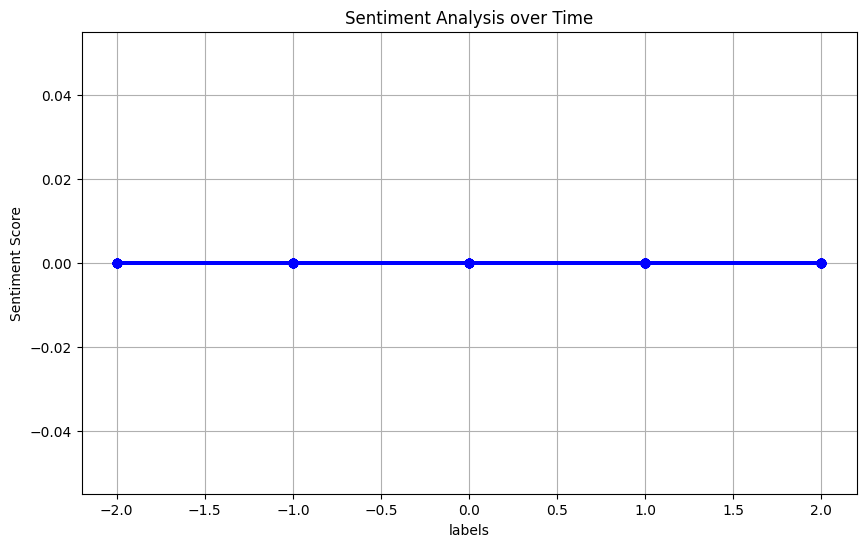

In [54]:
import matplotlib.pyplot as plt
# 날짜를 x축으로 하는 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['labels'], data['sentiment'], marker='o', linestyle='-', color='b')

# 그래프에 레이블과 제목 추가
plt.xlabel('labels')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()


In [41]:
import pandas as pd

file_path = '/content/drive/MyDrive/삼성전자.xlsx'
data = pd.read_excel(file_path)

# 데이터 확인
print(data.head())

   labels                            Description 
0      -2         삼성전자 폴더블폰 시장 점유율이 86%에서 72%로 하락
1       1  글로벌 폴더블폰 시장이 전년 대비 16%, 전분기 대비 215% 증가
2      -1         중국 업체들의 공격적인 제품 출시로 삼성전자 점유율 하락
3       2      삼성 갤럭시Z 플립5와 폴드5, 시장에서 가장 잘 팔리는 모델
4       1  4분기 삼성전자 폴더블폰 점유율, 작년 83%에서 42%로 하락 예상


In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_score = senti_analyzer.polarity_scores(data['Description '][0])
print(senti_score)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [48]:
from tkinter.constants import Y
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

def get_sentiment(data, threshold):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(data)

    # 수정: 'compound' 키를 사용하여 compound 점수를 추출
    compound_score = scores['compound']
    final_sentiment = 1 if compound_score >= threshold else 0
    return final_sentiment

data['vader_pred'] = data['Description '].apply(lambda x: get_sentiment(x, 0.1))
y_target = data['labels']
y_pred = data['vader_pred']

print(confusion_matrix(y_target, y_pred))
print("정확도 :", accuracy_score(y_target, y_pred))
print("정밀도 (Macro 평균)", precision_score(y_target, y_pred, average='macro'))
print("재현율 (Macro 평균)", recall_score(y_target, y_pred, average='macro'))
print("F1-Score (Macro 평균)", f1_score(y_target, y_pred, average='macro'))

[[ 0  0 13  0  0]
 [ 0  0 19  0  0]
 [ 0  0 12  0  0]
 [ 0  0 37  0  0]
 [ 0  0 29  0  0]]
정확도 : 0.10909090909090909
정밀도 (Macro 평균) 0.021818181818181816
재현율 (Macro 평균) 0.2
F1-Score (Macro 평균) 0.039344262295081964


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
